In [2]:
#see plots in Jupyter
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#make pandas dataframe
filename = "nrg_ind_335a_1_Data.csv"
df = pd.read_csv(filename, encoding = "ISO-8859-1")

#see head
df.head()

,TIME,GEO,UNIT,INDIC_EN,Value,Flag and Footnotes
0,2006,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,9.5,NaN
1,2006,European Union (28 countries),Percentage,Share of renewable energy in transport,2.5,NaN
2,2006,European Union (28 countries),Percentage,Share of renewable energy in electricity,15.4,NaN
3,2006,European Union (28 countries),Percentage,Share of renewable energy in heating and cooling,11.4,NaN
4,2006,Belgium,Percentage,Share of renewable energy in gross final energ...,2.6,NaN


In [3]:
#get dimensions of data frame
df.shape

(1400, 6)

In [4]:
#list data type of each column, number of non-missing values, memry usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
TIME                  1400 non-null int64
GEO                   1400 non-null object
UNIT                  1400 non-null object
INDIC_EN              1400 non-null object
Value                 1400 non-null float64
Flag and Footnotes    0 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 65.7+ KB


In [5]:
#get summary statistics for numerical columns, transpose for more readable output
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
TIME,1400.0,2010.500,2.873308,2006.0,2008.0,2010.5,2013.000,2015.0
Value,1400.0,19.161,19.760431,0.0,4.8,13.0,28.125,113.7
Flag and Footnotes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#get summary statistics for object and categorical columns
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
GEO,1400,35,Czech Republic,40
UNIT,1400,1,Percentage,1400
INDIC_EN,1400,4,Share of renewable energy in electricity,350


In [7]:
#see which INDIC_EN are there
df.INDIC_EN.unique()

array(['Share of renewable energy in gross final energy consumption',
       'Share of renewable energy in transport',
       'Share of renewable energy in electricity',
       'Share of renewable energy in heating and cooling'], dtype=object)

In [8]:
#see which GEO are there
df.GEO.unique()

array(['European Union (28 countries)', 'Belgium', 'Bulgaria',
       'Czech Republic', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
       'Iceland', 'Norway', 'Montenegro',
       'Former Yugoslav Republic of Macedonia, the', 'Albania', 'Turkey'], dtype=object)

In [9]:
#filter dataframe by means of boolean indexing/ boolean selection: european union, gross final
eu_crit1 = df.GEO == "European Union (28 countries)"
eu_crit2 = df.INDIC_EN == "Share of renewable energy in gross final energy consumption"
eu_crit = eu_crit1 & eu_crit2
eu = df.loc[eu_crit]
eu

,TIME,GEO,UNIT,INDIC_EN,Value,Flag and Footnotes
0,2006,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,9.5,NaN
140,2007,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,10.4,NaN
280,2008,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,11.0,NaN
420,2009,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,12.4,NaN
560,2010,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,12.9,NaN
700,2011,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,13.2,NaN
840,2012,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,14.4,NaN
980,2013,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,15.2,NaN
1120,2014,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,16.1,NaN
1260,2015,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,16.7,NaN


Text(0,0.5,'share in %')

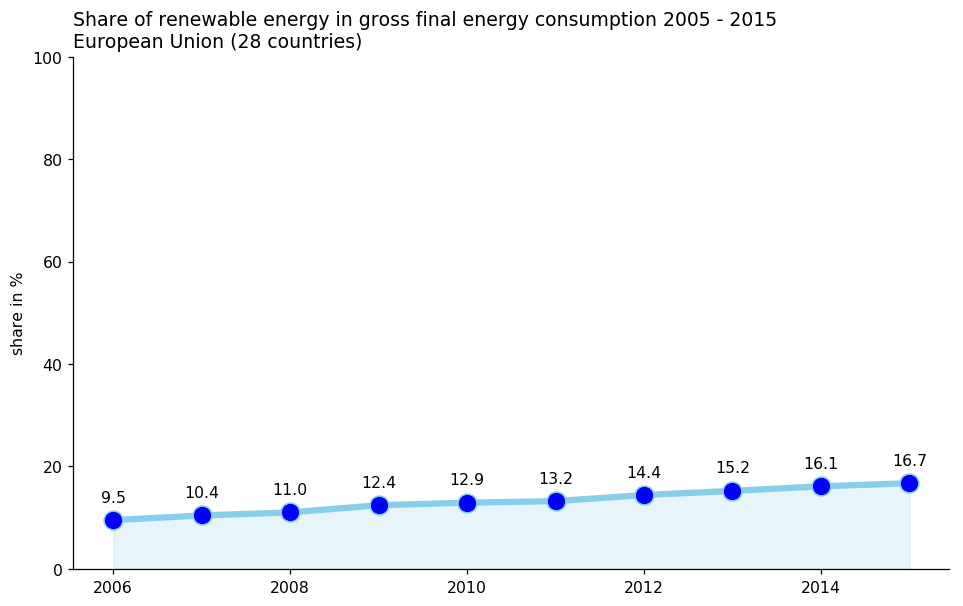

In [12]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 6), dpi=my_dpi)

#make plot
plt.ylim(0, 100)
plt.fill_between("TIME", "Value", data=eu, color="skyblue", alpha=0.2)
plt.plot("TIME", "Value", data=eu, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4) 
sns.despine()

for index in eu.index:
    time = eu["TIME"].loc[index]
    value = eu["Value"].loc[index]
    plt.text(time, value + 3, str(value), ha='center', va='bottom')

# Add titles
plt.title("Share of renewable energy in gross final energy consumption 2006 - 2015\nEuropean Union (28 countries)", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("share in %")

In [33]:
#filter dataframe by means of boolean indexing/ boolean selection: single countries, gross final, 2015
countries_crit1 = df.GEO != "European Union (28 countries)"
countries_crit2 = df.INDIC_EN == "Share of renewable energy in gross final energy consumption"
countries_crit3 = df.TIME == 2015
countries_crit = countries_crit1 & countries_crit2 & countries_crit3
countries = df.loc[countries_crit]

#replace long country names, sort by value (descending)
countries = countries.replace('Germany (until 1990 former territory of the FRG)', 'Germany')\
    .replace('Former Yugoslav Republic of Macedonia, the', 'Rep. of Macedonia')\
       .sort_values("Value", ascending=False)

#take only the 20 biggest consumers
#countries = countries[:20]
countries

34

Text(0,0.5,'')

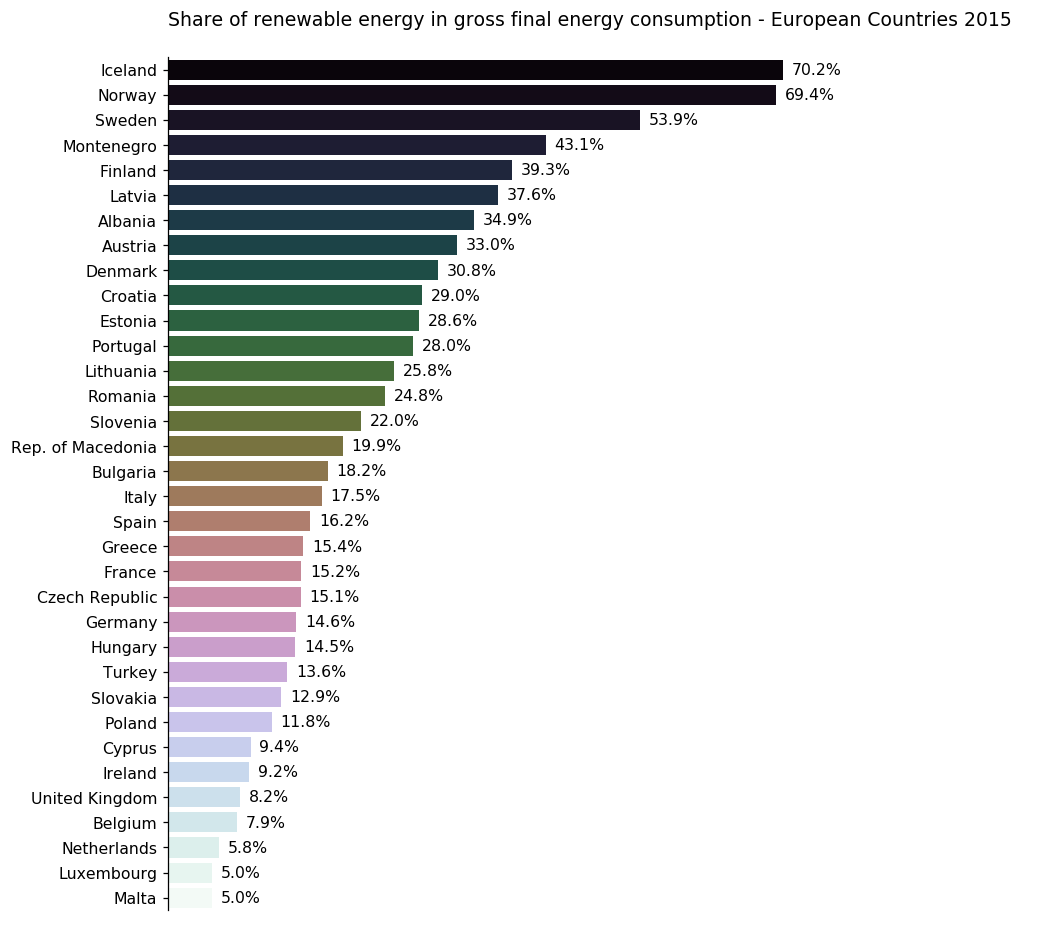

In [35]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 10), dpi=my_dpi)
plt.xlim(0, 100)

#make plot
ax = sns.barplot(y=countries.GEO, x=countries.Value, data = countries, palette="cubehelix")
sns.despine()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

#Attach a text label right of each bar displaying its length
rects = ax.patches
for rect in rects:
    width = rect.get_width()
    ax.text(width + 1, rect.get_y() + rect.get_height()/2, str(width) + "%", ha='left', va='center')

# Add titles
plt.title("Share of renewable energy in gross final energy consumption - European Countries 2015\n", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("")